In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [3]:
# import dataset
xTrain = pd.read_csv("xTrain.csv")
yTrain = pd.read_csv("yTrain_discrete.csv")
xTest = pd.read_csv("xTest.csv")
yTest = pd.read_csv("yTest_discrete.csv")

In [3]:
model = XGBClassifier()

In [4]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=334)

Max depth:  3
Accuracy:  0.6146399481865925
Max depth:  5
Accuracy:  0.6182636303305213
Max depth:  15
Accuracy:  0.630274972206595
Max depth:  30
Accuracy:  0.6276987047179711
Max depth:  50
Accuracy:  0.6282393098236325


<function matplotlib.pyplot.show(close=None, block=None)>

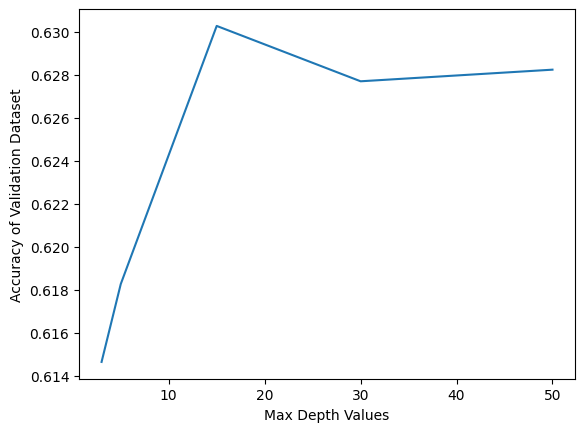

In [6]:
# for max_depth
max_depths = [3, 5, 15, 30, 50]

avg_accuracies = []
for max_depth in max_depths:
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = XGBClassifier(max_depth=max_depth,
                                  learning_rate=0.01,
                                  subsample=0.5)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    avg_accuracy = np.mean(acc_scores)
    avg_accuracies.append(avg_accuracy)
    print("Max depth: ", max_depth)
    print("Accuracy: ", avg_accuracy)

plt.plot(max_depths, avg_accuracies)
plt.xlabel("Max Depth Values")
plt.ylabel("Accuracy of Validation Dataset")
plt.show


Learning Rate:  0.1
Accuracy:  0.6277493686205082
Learning Rate:  0.01
Accuracy:  0.6182636303305213
Learning Rate:  0.001
Accuracy:  0.5933371051542163
Learning Rate:  0.0001
Accuracy:  0.511217335563044
Learning Rate:  1e-05
Accuracy:  0.511217335563044


<function matplotlib.pyplot.show(close=None, block=None)>

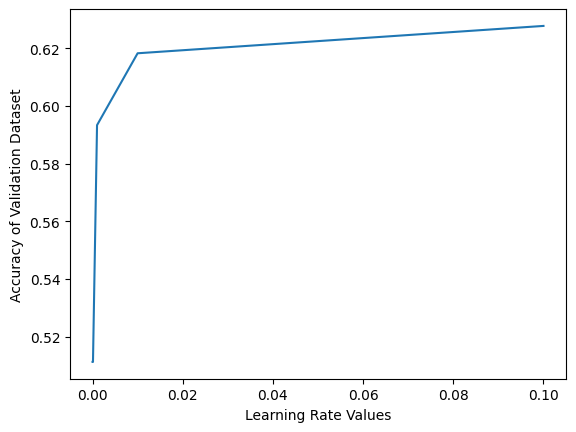

In [7]:
# for learning rate
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]

avg_accuracies = []
for lr in learning_rates:
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = XGBClassifier(max_depth=5,
                                  learning_rate=lr,
                                  subsample=0.5)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    avg_accuracy = np.mean(acc_scores)
    avg_accuracies.append(avg_accuracy)
    print("Learning Rate: ", lr)
    print("Accuracy: ", avg_accuracy)

plt.plot(learning_rates, avg_accuracies)
plt.xlabel("Learning Rate Values")
plt.ylabel("Accuracy of Validation Dataset")
plt.show


Subsample:  0.5
Accuracy:  0.6277493686205082
Subsample:  0.6
Accuracy:  0.6288305724104151
Subsample:  0.7
Accuracy:  0.6275551022337063
Subsample:  0.9
Accuracy:  0.6278929693210461
Subsample:  1
Accuracy:  0.6275044112185235


<function matplotlib.pyplot.show(close=None, block=None)>

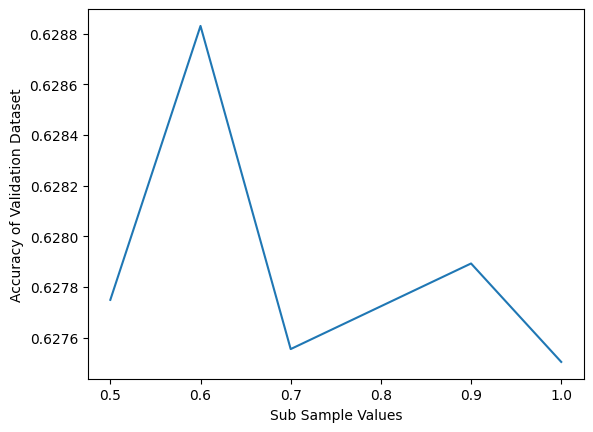

In [8]:
# for sub sample
subsamples = [0.5, 0.6, 0.7, 0.9, 1]

avg_accuracies = []
for subsample in subsamples:
    acc_scores = []
    for train_index, validation_index in k_fold.split(xTrain):
        cur_model = XGBClassifier(max_depth=5,
                                  learning_rate=0.1,
                                  subsample=subsample)
        cur_model.fit(xTrain.iloc[train_index], np.ravel(yTrain.iloc[train_index]))
        acc_scores.append(cur_model.score(xTrain.iloc[validation_index], np.ravel(yTrain.iloc[validation_index])))
    avg_accuracy = np.mean(acc_scores)
    avg_accuracies.append(avg_accuracy)
    print("Subsample: ", subsample)
    print("Accuracy: ", avg_accuracy)

plt.plot(subsamples, avg_accuracies)
plt.xlabel("Sub Sample Values")
plt.ylabel("Accuracy of Validation Dataset")
plt.show

In [3]:
clf = XGBClassifier(max_depth=3, learning_rate=0.01, subsample=0.6)

In [4]:
clf.fit(xTrain, yTrain)
# get the accuracy on the training dataset
acc = clf.score(xTrain, yTrain)
print("Training accuracy with optimal hyper parameter: ", acc)
# predict on test dataset
acc = clf.score(xTest, yTest)
print("Test accuracy with optimal hyper parameter: ", acc)

Training accuracy with optimal hyper parameter:  0.6309698582373721
Test accuracy with optimal hyper parameter:  0.6000091751536838


In [5]:
# Evaluation
y_proba = clf.predict_proba(xTest)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(yTest, y_proba)
roc_auc = auc(fpr, tpr)

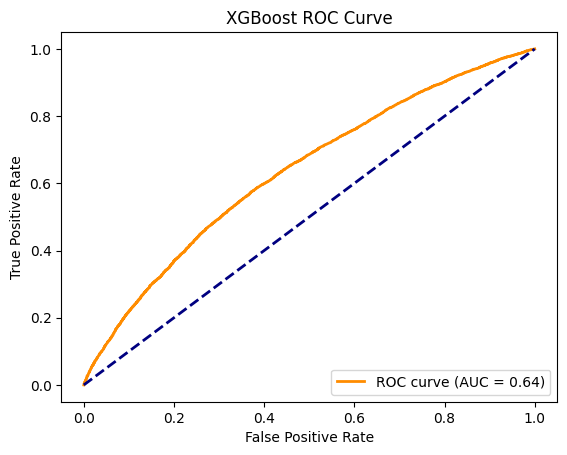

AUC: 0.6351470487524988


In [6]:
# Plot ROC curve
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Calculate AUC
print("AUC:", roc_auc)

In [7]:
# Predict on test dataset
yHat = clf.predict(xTest)

# Calculate F1 score
f1 = f1_score(yTest, yHat)
print("F1 Score:", f1)

F1 Score: 0.6409717932880379


Hyper Parameter Tuning with Grid Search

In [10]:
param_grid = {
    'max_depth': [3, 5, 15, 30, 50],
    'learning_rate': [0.1, 0.01, 0.001, 0.0001, 0.00001],
    'subsample': [0.5, 0.6, 0.7, 0.9, 1]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(xTrain, yTrain)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001, 0.0001, 1e-05],
                         'max_depth': [3, 5, 15, 30, 50],
                         'subsample': [0.5, 0.6, 0.7, 0.9, 1]},
             scoring='accuracy')

In [11]:
best_params = grid_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}


In [12]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xTest)

In [13]:
accuracy = accuracy_score(yTest, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6015271302115007
